Import libraries

In [ ]:
import torch
import monai
from monai.utils import set_determinism

from sklearn.model_selection import train_test_split

from utils.data_load import get_data_list, get_2D_data, get_2D_datasets
from utils.transforms import get_2D_transforms

In [ ]:
print(f"🏆 Complete UNETR 2D Training with MONAI", flush=True)
print(f"PyTorch: {torch.__version__}", flush=True)
print(f"MONAI: {monai.__version__}", flush=True)

# Set reproducibility
set_determinism(seed=42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}", flush=True)

DATA_ROOT = "/scratch/cv-course2025/lschind5/kits19/data"
BATCH_SIZE = 8
NUM_EPOCHS = 100
NUM_WORKERS = 4
LR = 0.0001

# load data
all_cases = get_data_list(DATA_ROOT)
print(f"   Found {len(all_cases)} cases", flush=True)

# Split data
train_data, val_data = train_test_split(
    all_cases, test_size=0.2, random_state=42
)


train_cases = [case["case_id"] for case in train_data]
val_cases = [case["case_id"] for case in val_data]

train_list, val_list = get_2D_data(train_cases, val_cases, DATA_ROOT)
print(f"   Unaugmented {len(train_list)} slices, validating on {len(val_list)} slices", flush=True)

# Get transforms
aug_transforms, no_aug_transforms = get_2D_transforms()

# Get datasets and loaders
train_loader, test_loader, train_dataset, val_dataset = get_2D_datasets(train_list, val_list, aug_transforms, no_aug_transforms, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

🏆 Complete UNETR 2D Training with MONAI
PyTorch: 2.6.0+cu124
MONAI: 1.5.0
Device: cuda
   Found 210 cases
   Kept 236 background-only slices out of 23669
   Unaugmented 13567 slices, validating on 8424 slices
   Upsampled  to 13932 tumor slices, originally 4644 slices with tumor


# Verify whether augmentation and upsampling fixed class-proportions

In [5]:
background_pixel_counts = 0
tumor_pixel_counts = 0
kidney_pixel_counts = 0

for data in train_dataset:
    image = data["image"]
    label = data["label"]
    
    background_pixel_counts += (label == 0).sum().item()
    tumor_pixel_counts += (label == 1).sum().item()
    kidney_pixel_counts += (label == 2).sum().item()

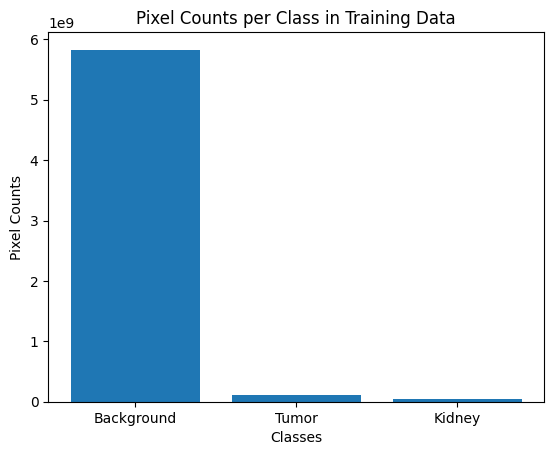

In [6]:
import matplotlib.pyplot as plt

# plot class ratios
labels = ['Background', 'Tumor', 'Kidney']
counts = [background_pixel_counts, tumor_pixel_counts, kidney_pixel_counts]
plt.bar(labels, counts)
plt.xlabel('Classes')
plt.ylabel('Pixel Counts')
plt.title('Pixel Counts per Class in Training Data')
plt.show()

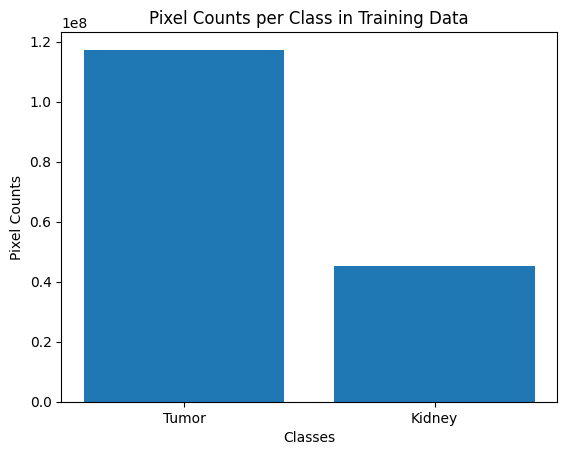

In [7]:
import matplotlib.pyplot as plt

# plot class ratios
labels = ['Tumor', 'Kidney']
counts = [tumor_pixel_counts, kidney_pixel_counts]
plt.bar(labels, counts)
plt.xlabel('Classes')
plt.ylabel('Pixel Counts')
plt.title('Pixel Counts per Class in Training Data')
plt.show()